#### Connecting a sqlite file to get some insights on the movies dataset 

In [147]:
import sqlite3 as sql

In [148]:
connection = sql.connect('movies.sqlite')

In [149]:
cursor = connection.cursor()

In [150]:
query = 'SELECT * FROM movies'

In [151]:
cursor.execute(query)

In [152]:
result = cursor.fetchall()

In [153]:
import pandas as pd

In [154]:
#### Having a look at the tables in this dataset

In [155]:
movies = pd.read_sql_query(query,connection)
movies.head(2)

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763


In [156]:
directors = pd.read_sql_query('SELECT * FROM directors', connection)
directors.head(2)

,name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing


## Question 1 Finding out the popular and highly rated movies.

In [159]:
#### For popular movies, we can set a threshold of having votes > 10,000.
#### For high quality movies, we can order the dataframe by ratings to see the 'best' movies.

In [176]:
query1 = '''
         SELECT m.title as movie, m.vote_count as votes, m.vote_average as rating, d.name
         FROM movies as m
         INNER JOIN directors as d
         ON m.director_id = d.id
         GROUP BY movie
         HAVING votes > 10000
         ORDER BY -votes         
         LIMIT 10
         '''
df1 = pd.read_sql_query(query1,connection)
df1

,movie,votes,rating,name
0,Inception,13752,8.1,Christopher Nolan
1,The Dark Knight,12002,8.2,Christopher Nolan
2,Avatar,11800,7.2,James Cameron
3,The Avengers,11776,7.4,Joss Whedon
4,Deadpool,10995,7.4,Tim Miller
5,Interstellar,10867,8.1,Christopher Nolan
6,Django Unchained,10099,7.8,Quentin Tarantino


Seems like Christopher Nolan is one of the best directors in the world. Lets find out the movies that he had directed and the average rating.

### Finding out all movies that CHRISTOPHER NOLAN had directed and binge them in movie nights.

In [118]:
#### Need to watch those movies by CHRISTOPHER NOLAN in order by popularity.

In [51]:
query_cn = '''
         SELECT m.title as movie, m.vote_count as votes, m.vote_average as rating
         FROM movies as m
         INNER JOIN directors as d
         ON m.director_id = d.id
         WHERE d.name = 'Christopher Nolan'
         ORDER BY -votes        
         '''
df_cn = pd.read_sql_query(query_cn, connection)
df_cn

,movie,votes,rating
0,Inception,13752,8.1
1,The Dark Knight,12002,8.2
2,Interstellar,10867,8.1
3,The Dark Knight Rises,9106,7.6
4,Batman Begins,7359,7.5
5,The Prestige,4391,8.0
6,Memento,4028,8.1
7,Insomnia,1148,6.8


In [55]:
print("Average rating of Christopher Nolan's movies is",df_cn['rating'].mean())

Average rating of Christopher Nolan's movies is 7.8


In [63]:
listi = df_cn['movie'].to_list()
list_of_movies = ', '.join([x for x in listi])
print("Please go and watch these awesome movies: " + list_of_movies + ".")

Please go and watch these awesome movies: Inception, The Dark Knight, Interstellar, The Dark Knight Rises, Batman Begins, The Prestige, Memento, Insomnia.


## Question 2 Which directors produced most movies (Top 10 list) with average rating

In [161]:
query2 = '''
         SELECT d.name, count(*) as count, AVG(m.vote_average) as rating
         from directors as d 
         INNER JOIN movies as m
         ON d.id = m.director_id 
         GROUP BY name
         ORDER BY -count
         LIMIT 10
         '''

df2 = pd.read_sql_query(query2,connection)
df2

,name,count,rating
0,Steven Spielberg,27,6.974074
1,Woody Allen,21,6.685714
2,Clint Eastwood,20,6.865000
3,Martin Scorsese,20,7.295000
4,Ridley Scott,16,6.693750
5,Robert Rodriguez,16,5.875000
6,Spike Lee,16,6.456250
7,Renny Harlin,15,5.720000
8,Steven Soderbergh,15,6.326667
9,Oliver Stone,14,6.614286


Seems like Steven Spielberg directed most number of movies with 27, followed by Woody Allen (21), and Clint Eastwood tied with Martin Scorsese (20).

Since Christopher Nolan has 7.8 ratings, maybe I should find out who else is a 'good director' with at least of 3 movies directed and a rating of 7.0++ . 

In [162]:
## After grouping, use number of movies directed of 3 as threshold.

query3 = '''
         SELECT d.name, count(*) as count, AVG(m.vote_average) as rating
         from directors as d 
         INNER JOIN movies as m
         ON d.id = m.director_id 
         GROUP BY name
         HAVING COUNT >= 3 
         ORDER BY -rating
         LIMIT 10
         '''

df3 = pd.read_sql_query(query3,connection)
df3

,name,count,rating
0,Hayao Miyazaki,4,8.050000
1,Sergio Leone,4,8.000000
2,Christopher Nolan,8,7.800000
3,Quentin Tarantino,8,7.775000
4,Pete Docter,3,7.733333
5,Stanley Kubrick,6,7.683333
6,Denis Villeneuve,3,7.666667
7,Miloš Forman,3,7.633333
8,Frank Capra,5,7.620000
9,Billy Wilder,4,7.600000


We also found out that Hayao Miyazaki from Studio Ghibli produced some of the highest quality Japanese Anime Movie. 

## Question 3 Find out which movie had the best revenue/budget ratio and the director

In [164]:
movies.head(2)

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763


In [168]:
#### The release_date is in the format of YYYY-MM-DD. However, this might be too long and I'm only interested in the Year.
#### So, use strfttime to parse the year only.

In [179]:
query_earn = '''
         SELECT m.title as movie, m.vote_average as rating, d.name, m.revenue/m.budget as ratio, 
         strftime('%Y', m.release_date) AS Year
         FROM movies as m
         INNER JOIN directors as d
         ON m.director_id = d.id
         WHERE ratio is NOT NULL
         ORDER BY -ratio         
         LIMIT 10
         '''
df_earn = pd.read_sql_query(query_earn, connection)
df_earn

,movie,rating,name,ratio,Year
0,Modern Times,8.1,Charlie Chaplin,8500000,1936
1,Nurse 3-D,4.9,Douglas Aarniokoski,1000000,2013
2,Paranormal Activity,5.9,Oren Peli,12890,2007
3,Tarnation,7.5,Jonathan Caouette,5330,2003
4,The Blair Witch Project,6.3,Daniel Myrick,4133,1999
5,Eraserhead,7.5,David Lynch,700,1977
6,Pink Flamingos,6.2,John Waters,500,1972
7,Super Size Me,6.6,Morgan Spurlock,439,2004
8,The Gallows,4.9,Travis Cluff,426,2015
9,Open Water,5.4,Chris Kentis,420,2004


Charlie Chaplin is indeed a movie genius with the staggering revenue to budget ratio of 8,500,000. What a return of investment.

## OK, but what about the profit ratio of revenue/budget for all the movies out there?

In [178]:
query_earn1 = '''
         SELECT m.title as movie, m.vote_average as rating, d.name, m.revenue/m.budget as ratio, 
         strftime('%Y', m.release_date) AS Year
         FROM movies as m
         INNER JOIN directors as d
         ON m.director_id = d.id
         WHERE ratio is NOT NULL
         ORDER BY -ratio         
         '''
df_earn1 = pd.read_sql_query(query_earn1, connection)
df_earn1['ratio'].median()

1.0

In [180]:
df_earn1['ratio'].mean()

2537.80526735834

Seems like the data for this profit ratio is right skewed where mean < median. When the data is skewed, it is better to use median. Therefore, the movies are normally at breakeven where the revenue = budget.

## Question 4 Find out all the years of average vote count and ratings, are they increasing?

Let's find out if the average votes and average ratings are increasing throughout the years.

In [92]:
query_avg = '''
         SELECT strftime('%Y', m.release_date) AS Year, AVG(m.vote_average) as avg_ratings, AVG(m.vote_count) as avg_votes
         FROM movies as m
         INNER JOIN directors as d
         ON m.director_id = d.id
         GROUP BY Year
         '''
df_avg = pd.read_sql_query(query_avg, connection)
df_avg

,Year,avg_ratings,avg_votes
0,1916,7.400000,60.000000
1,1925,7.000000,21.000000
2,1927,8.000000,657.000000
3,1929,6.300000,32.000000
4,1930,6.100000,19.000000
...,...,...,...
85,2013,6.115652,1140.878261
86,2014,5.631624,1064.038462
87,2015,5.642381,1001.761905
88,2016,5.833654,1146.384615


The average votes are indeed increasing throughout the years, but it is not the same for the average ratings. For further confirmation, let's do some simple plotting

In [169]:
import matplotlib.pyplot as plt

In [170]:
df_recent = df_avg.tail(20)

Text(0, 0.5, 'Average votes')

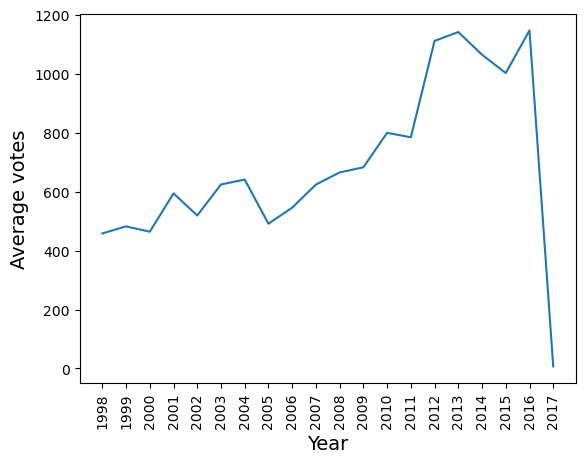

In [171]:
plt.plot('Year','avg_votes',data = df_recent)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Average votes', fontsize=14)

Seems like 2017 is an outlier, maybe there are not enough data, lets check how many movies produced in 2017 in this data.

In [172]:
query_movies = '''
         SELECT strftime('%Y', m.release_date) AS Year, COUNT(*) as count
         FROM movies as m
         GROUP BY Year
         '''
df_num = pd.read_sql_query(query_movies, connection)
df_num

,Year,count
0,1916,1
1,1925,1
2,1927,1
3,1929,2
4,1930,1
...,...,...
85,2013,230
86,2014,234
87,2015,210
88,2016,104


As expected, there is only 1 movie in 2017. Maybe the data collection is not completed. We can ignore 2017 for now.

Now, select the most recent 20 years to study the trend of the average votes and average ratings.

In [173]:
plot_data = df_recent.tail(21)[:-1]

Text(0, 0.5, 'Average votes')

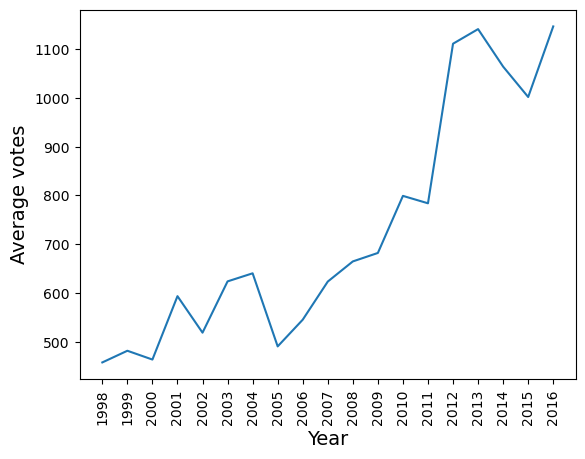

In [174]:
plt.plot('Year','avg_votes',data = plot_data)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Average votes', fontsize=14)

Text(0, 0.5, 'Average ratings')

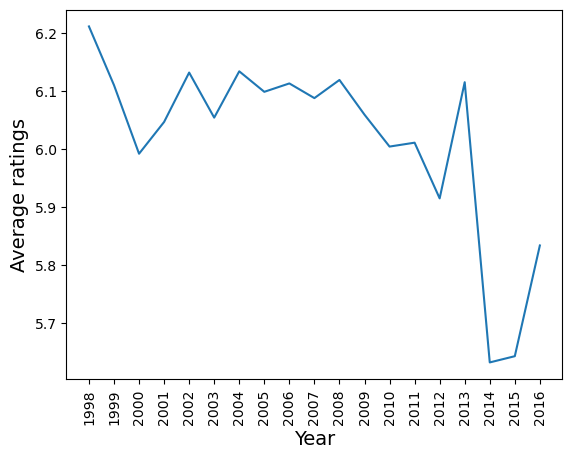

In [175]:
plt.plot('Year','avg_ratings',data = plot_data)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Average ratings', fontsize=14)

From this dataset, we can confirmed that the average votes are increasing throughout the years. However, the average ratings are plummeting in 2014 and 2015. It's also interesting to note that the average votes increases although the average ratings decreases.

## Question 5 Top revenue movies and its directors

In [141]:
query_revenue = '''
         SELECT title, ROUND(revenue/1000,0) as revenue_in_thousands, ROUND(revenue/budget,1) as ratio, name
         FROM movies as m
         INNER JOIN directors as d 
         ON m.director_id = d.id
         ORDER BY -revenue_in_thousands
         LIMIT 10
         '''
df_rev = pd.read_sql_query(query_revenue, connection)
df_rev

,title,revenue_in_thousands,ratio,name
0,Avatar,2787965.0,11.0,James Cameron
1,Titanic,1845034.0,9.0,James Cameron
2,The Avengers,1519557.0,6.0,Joss Whedon
3,Jurassic World,1513528.0,10.0,Colin Trevorrow
4,Furious 7,1506249.0,7.0,James Wan
5,Avengers: Age of Ultron,1405403.0,5.0,Joss Whedon
6,Frozen,1274219.0,8.0,Chris Buck
7,Iron Man 3,1215439.0,6.0,Shane Black
8,Minions,1156730.0,15.0,Kyle Balda
9,Captain America: Civil War,1153304.0,4.0,Anthony Russo


James Cameron is one of the highest grossing directors.

## Question 6 Movies with the highest budget and its directors

In [144]:
query_budget = '''
         SELECT title, ROUND(budget/1000,0) as budget_in_thousands,ROUND(revenue/budget,1) as ratio, name
         FROM movies as m
         INNER JOIN directors as d 
         ON m.director_id = d.id
         ORDER BY -budget_in_thousands
         LIMIT 10
         '''
df_budget = pd.read_sql_query(query_budget, connection)
df_budget

,title,budget_in_thousands,ratio,name
0,Pirates of the Caribbean: On Stranger Tides,380000.0,2.0,Rob Marshall
1,Pirates of the Caribbean: At World's End,300000.0,3.0,Gore Verbinski
2,Avengers: Age of Ultron,280000.0,5.0,Joss Whedon
3,Superman Returns,270000.0,1.0,Bryan Singer
4,John Carter,260000.0,1.0,Andrew Stanton
5,Tangled,260000.0,2.0,Byron Howard
6,Spider-Man 3,258000.0,3.0,Sam Raimi
7,The Lone Ranger,255000.0,0.0,Gore Verbinski
8,The Dark Knight Rises,250000.0,4.0,Christopher Nolan
9,Harry Potter and the Half-Blood Prince,250000.0,3.0,David Yates


Pirates of the Carribean movies are really expensive to produce. Perhaps good salary for Johnny Depp.

We can see that the top revenue movies have a better profit ratio (revenue/budget) than the list of movies with highest budgets. 

Maybe the more you spend doesn't mean the more you will earn.

## Conclusion from simple looking around in this sqlite database.

1) Now, I have some movies to be watched from Christopher Nolan (3 most popular movies in Top10) and Hayao Miyazaki (Highest average rating for directors of >=3 movies).

2) The averages votes are increasing but the averages ratings are decreasing in the last 20 years

3) The median profit ratio for the movies in this dataset is just 1.0 (No earning, no loss)

4) The highest grossing movies tend to have better profit ratio (revenue/budget)

5) Higher budget does not translate to higher revenues.